# Jamboree Education

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso , Ridge

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.size

4500

In [6]:
pd.DataFrame(df.dtypes)

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.rename(columns={'LOR':"LOR"}, inplace=True)

In [10]:
df.drop(columns={"Serial No."}, inplace=True)

In [11]:
df.duplicated().sum()

0

In [178]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Analysis Univariate / Bivariate

### University_Rating

In [13]:
University_Rating = pd.DataFrame(df['University Rating'].value_counts(ascending=False)).reset_index()
University_Rating

,index,University Rating
0,3,162
1,2,126
2,4,105
3,5,73
4,1,34


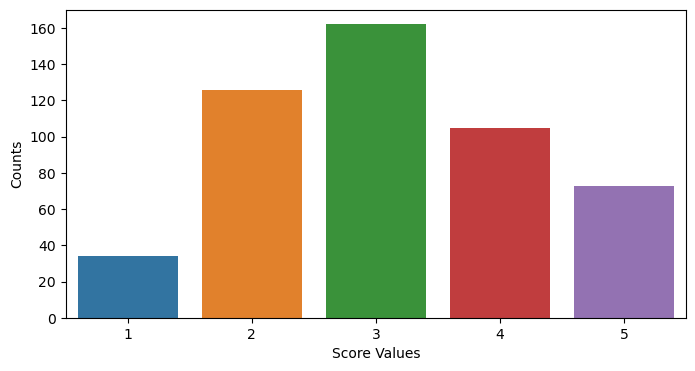

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(data=University_Rating, x='index', y='University Rating')
plt.xlabel("Score Values")
plt.ylabel("Counts")
plt.show()

### Research

In [15]:
Research = pd.DataFrame(df['Research'].value_counts(ascending=False)).reset_index()
Research

,index,Research
0,1,280
1,0,220


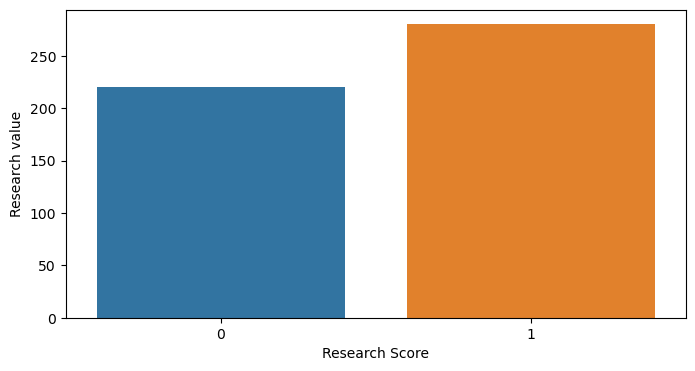

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(data=Research, x='index', y='Research')
plt.xlabel("Research Score")
plt.ylabel("Research value")
plt.show()

### SOP - Statement of Purpose

In [17]:
sop = pd.DataFrame(df['SOP'].value_counts()).reset_index()

In [18]:
sop.rename(columns={"index":"Levels", "SOP":"SOP_values"}, inplace=True)

In [19]:
sop.sort_index

<bound method DataFrame.sort_index of    Levels  SOP_values
0     4.0          89
1     3.5          88
2     3.0          80
3     2.5          64
4     4.5          63
5     2.0          43
6     5.0          42
7     1.5          25
8     1.0           6>

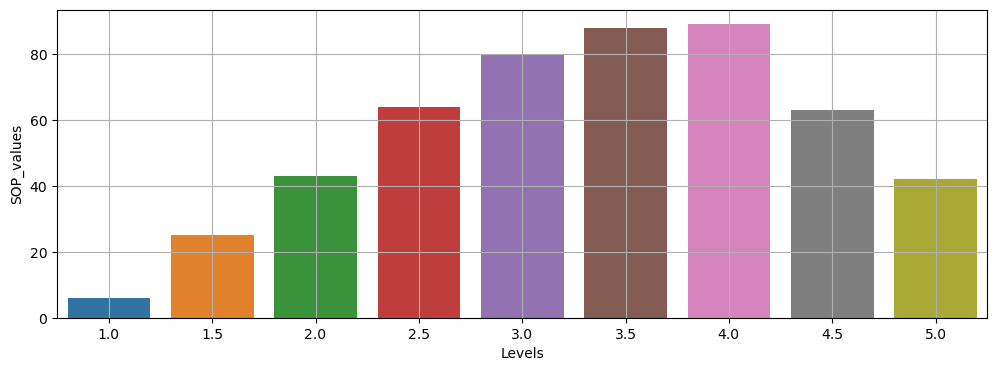

In [20]:
plt.figure(figsize=(12,4))
sns.barplot(data=sop, x='Levels', y='SOP_values')
plt.grid()
plt.show()

### LOR - Letter of Recommendation Strength

In [21]:
LOR = pd.DataFrame(df['LOR '].value_counts()).reset_index()
LOR

,index,LOR
0,3.0,99
1,4.0,94
2,3.5,86
3,4.5,63
4,2.5,50
5,5.0,50
6,2.0,46
7,1.5,11
8,1.0,1


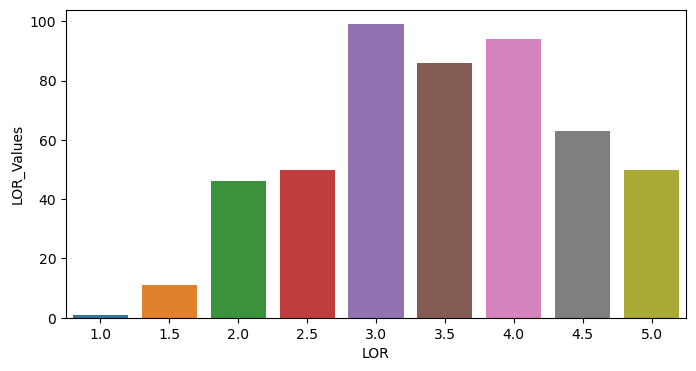

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=LOR, x='index', y='LOR ')
plt.xlabel("LOR")
plt.ylabel("LOR_Values")
plt.show()

# Feature Engineering

### Top Rated Chances of Admit Students

In [23]:
df[df['Chance of Admit '] == df['Chance of Admit '].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,336,119,5,4.0,3.5,9.80,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97


### Lowest Rated chance of Admit of students

In [24]:
df[df['Chance of Admit '] == df['Chance of Admit '].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


### Top CGPA Students

In [25]:
df[df['CGPA'] == df['CGPA'].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
143,340,120,4,4.5,4.0,9.92,1,0.97


### Lowest CGPA Students

In [26]:
df[df['CGPA'] == df['CGPA'].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


### Top GRE scored Students

In [27]:
df[df['GRE Score'] == df['GRE Score'].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,340,120,5,4.5,4.5,9.60,1,0.94
33,340,114,5,4.0,4.0,9.60,1,0.90
81,340,120,4,5.0,5.0,9.50,1,0.96
84,340,115,5,4.5,4.5,9.45,1,0.94
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
284,340,112,4,5.0,4.5,9.66,1,0.94
384,340,113,4,5.0,5.0,9.74,1,0.96
429,340,115,5,5.0,4.5,9.06,1,0.95


### Lowest GRE scored Students

In [28]:
df[ df['GRE Score'] == df['GRE Score'].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,290,104,4,2.0,2.5,7.46,0,0.45
377,290,100,1,1.5,2.0,7.56,0,0.47


### Top TOEL Scored Indivisulas

In [29]:
df[ df['TOEFL Score'] == df['TOEFL Score'].max()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,340,120,5,4.5,4.5,9.60,1,0.94
81,340,120,4,5.0,5.0,9.50,1,0.96
97,331,120,3,4.0,4.0,8.96,1,0.86
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
212,338,120,4,5.0,5.0,9.66,1,0.95
297,320,120,3,4.0,4.5,9.11,0,0.86
497,330,120,5,4.5,5.0,9.56,1,0.93


### Lowest TOEFL Score Students

In [30]:
df[ df['TOEFL Score'] == df['TOEFL Score'].min()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
368,298,92,1,2.0,2.0,7.88,0,0.51


# Checking for the Two columns Analysis, Bivariate

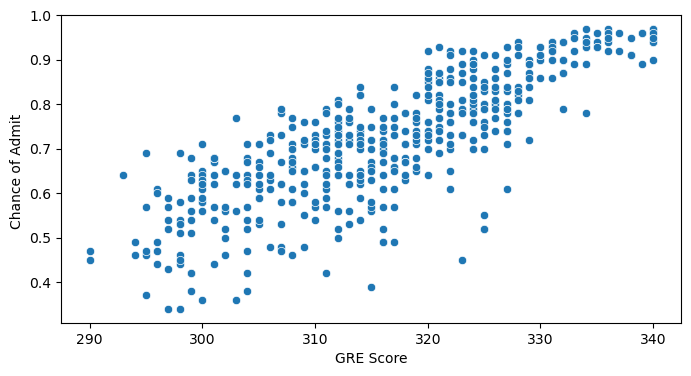

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit ')
plt.show()

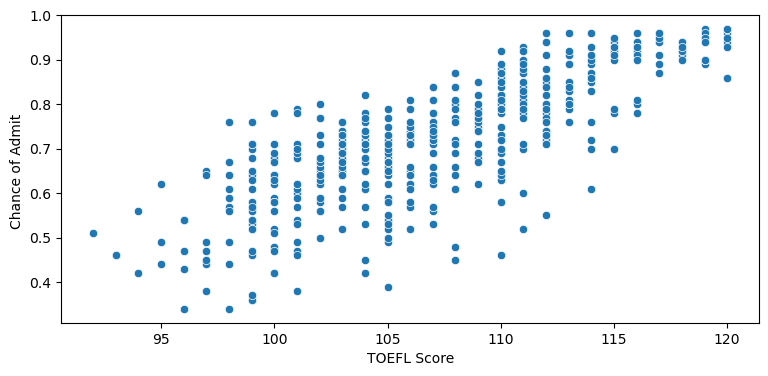

In [32]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit ')
plt.show()

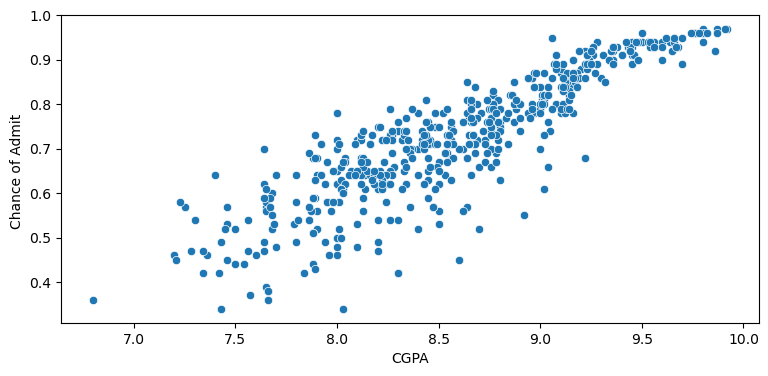

In [33]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit ')
plt.show()

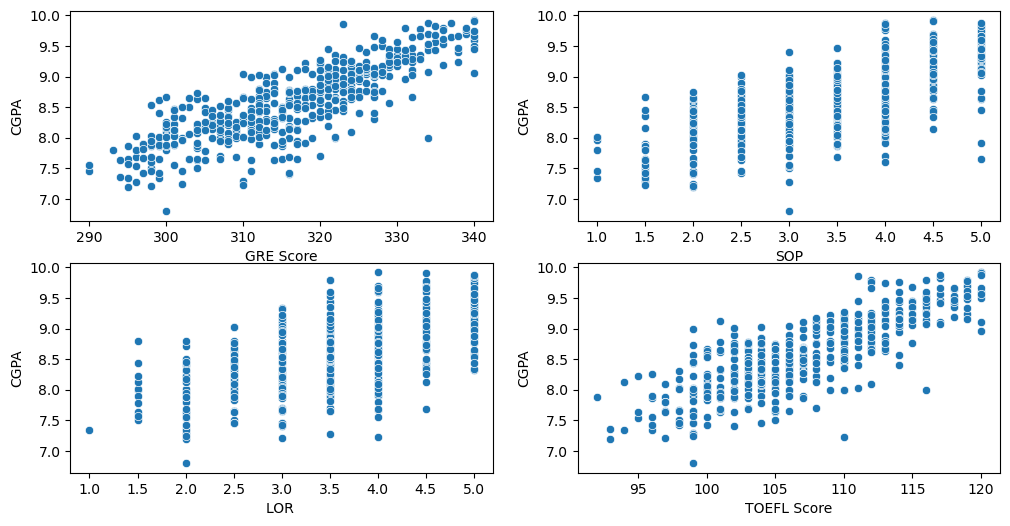

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='GRE Score', y='CGPA')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='SOP', y='CGPA')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='LOR ', y='CGPA')
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='TOEFL Score', y='CGPA')
plt.show()

In [35]:
pd.DataFrame(df.corr())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


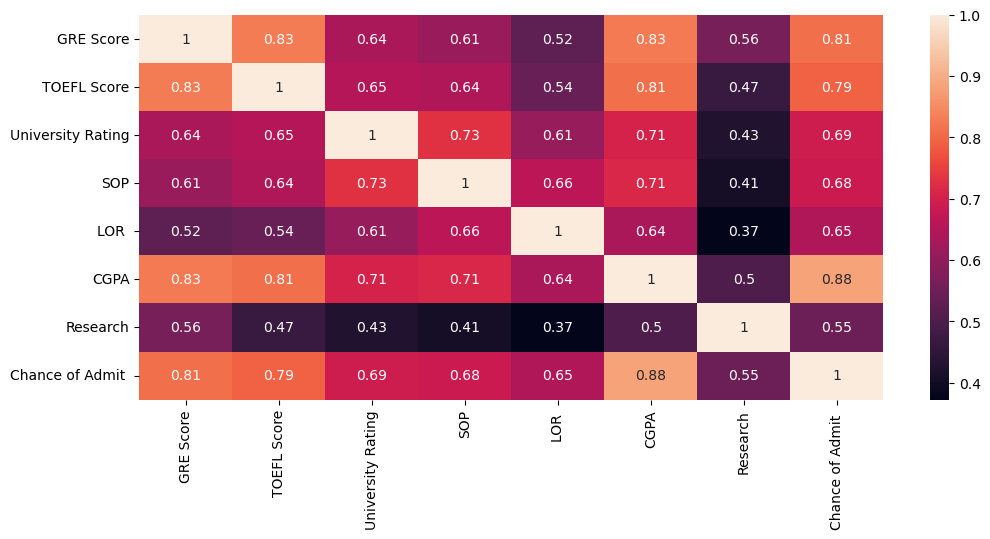

In [36]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

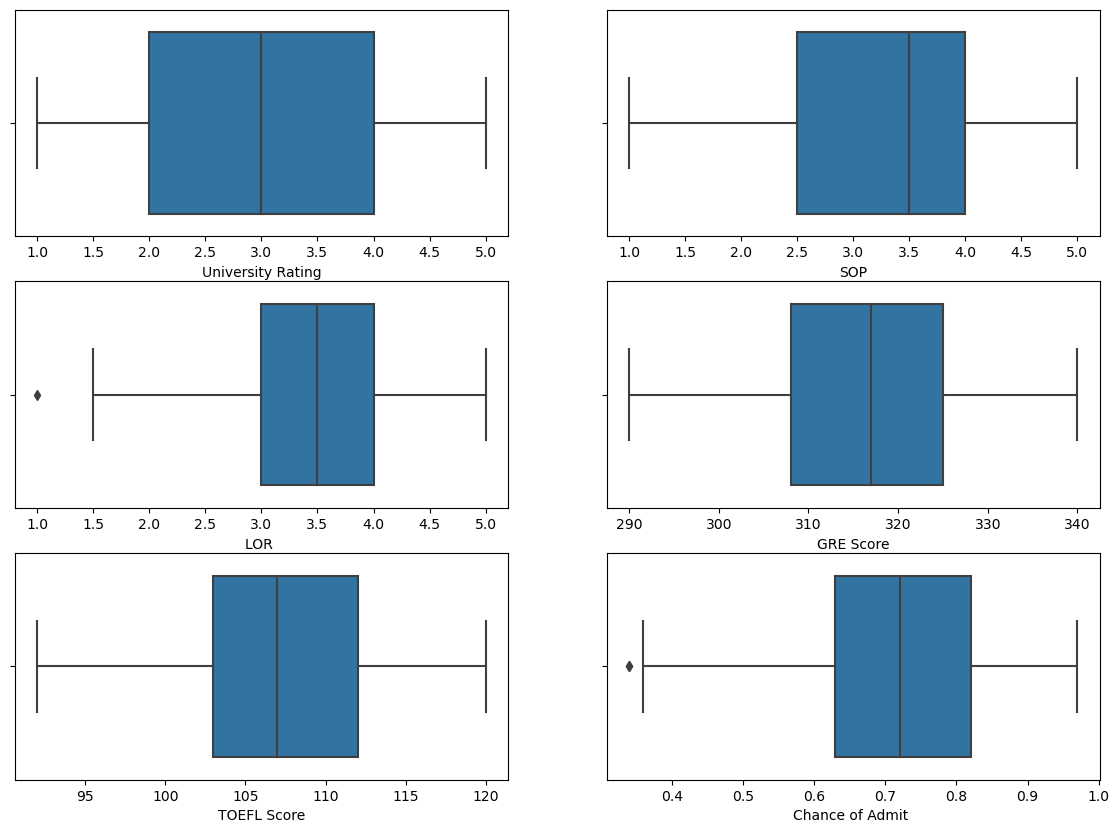

In [37]:
plt.figure(figsize=(14,10))
plt.subplot(3,2,1)
sns.boxplot(data=df, x='University Rating')
plt.subplot(3,2,2)
sns.boxplot(data=df, x='SOP')
plt.subplot(3,2,3)
sns.boxplot(data=df, x='LOR ')
plt.subplot(3,2,4)
sns.boxplot(data=df, x='GRE Score')
plt.subplot(3,2,5)
sns.boxplot(data=df, x='TOEFL Score')
plt.subplot(3,2,6)
sns.boxplot(data=df, x='Chance of Admit ')
plt.show()

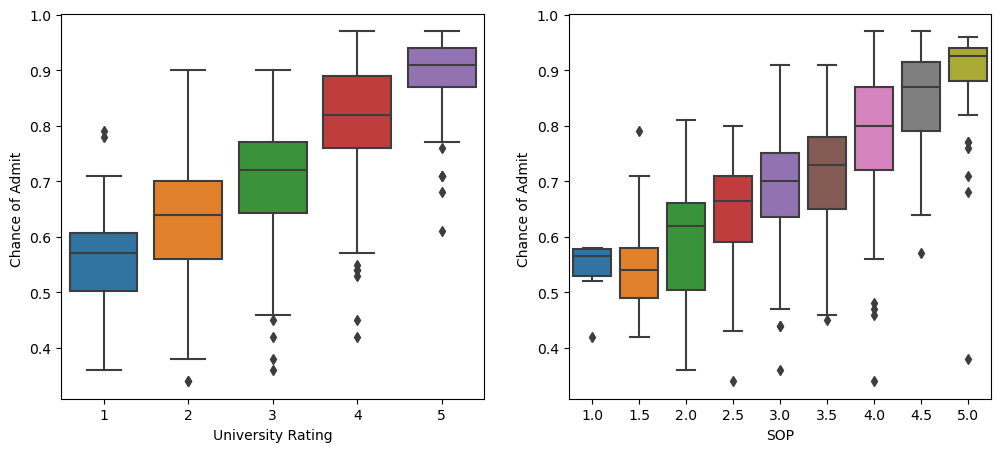

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='University Rating', y='Chance of Admit ')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='SOP', y='Chance of Admit ')
plt.show()

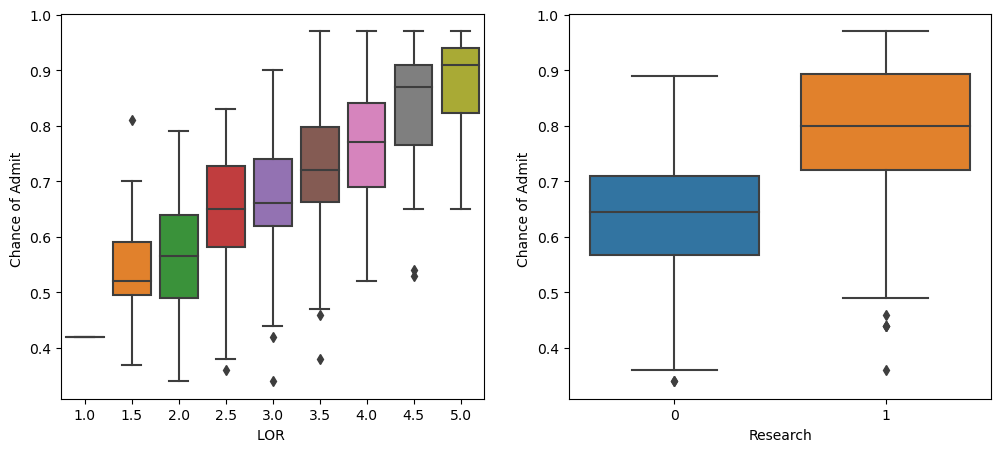

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='LOR ', y='Chance of Admit ')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Research', y='Chance of Admit ')
plt.show()

In [40]:
columns = df[['GRE Score', 'TOEFL Score','Chance of Admit ']]
columns

,GRE Score,TOEFL Score,Chance of Admit
0,337,118,0.92
1,324,107,0.76
2,316,104,0.72
3,322,110,0.80
4,314,103,0.65
...,...,...,...
495,332,108,0.87
496,337,117,0.96
497,330,120,0.93
498,312,103,0.73


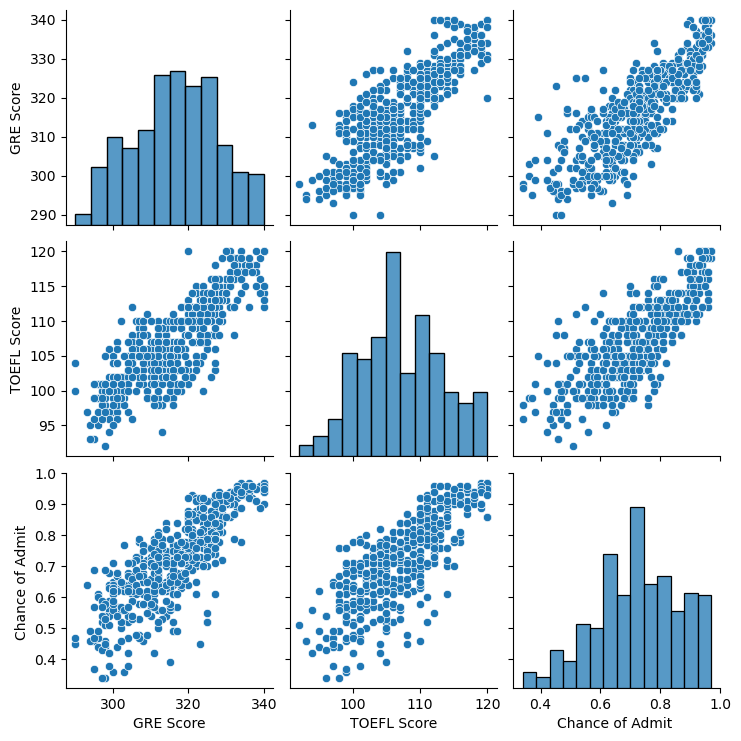

In [41]:
sns.pairplot(columns)
plt.show()

In [42]:
df.duplicated(keep='first').value_counts()

False    500
dtype: int64

### Checking for the Outliers

### GRE Score outliers

In [43]:
q1 = np.quantile(df['GRE Score'], 0.25)
q3 = np.quantile(df['GRE Score'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
print(df[(df['GRE Score'] < Lower_whishker) | (df['GRE Score'] > upper_whisker)])
print("No outliers are Present in GRE Score")

The 25th percentile 308.0 -- The 75th percentile 325.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
No outliers are Present in GRE Score


### TOEFL Score Outliers

In [44]:
q1 = np.quantile(df['TOEFL Score'], 0.25)
q3 = np.quantile(df['TOEFL Score'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
print(df[(df['TOEFL Score'] < Lower_whishker) | (df['TOEFL Score'] > upper_whisker)])
print("No outliers are Present in TOEFL Score")

The 25th percentile 103.0 -- The 75th percentile 112.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
No outliers are Present in TOEFL Score


### University Rating Outliers

In [45]:
q1 = np.quantile(df['University Rating'], 0.25)
q3 = np.quantile(df['University Rating'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
print(df[(df['University Rating'] < Lower_whishker) | (df['University Rating'] > upper_whisker)])
print("No outliers are Present in University Rating Score")

The 25th percentile 2.0 -- The 75th percentile 4.0
Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
No outliers are Present in University Rating Score


### SOP Outliers

In [46]:
q1 = np.quantile(df['SOP'], 0.25)
q3 = np.quantile(df['SOP'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
df[(df['SOP'] < Lower_whishker) | (df['SOP'] > upper_whisker)]

The 25th percentile 2.5 -- The 75th percentile 4.0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### LOR Outliers

In [47]:
q1 = np.quantile(df['LOR '], 0.25)
q3 = np.quantile(df['LOR '], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
df[(df['LOR '] < Lower_whishker) | (df['LOR '] > upper_whisker)]

The 25th percentile 3.0 -- The 75th percentile 4.0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


### CGPA Outliers

In [48]:
q1 = np.quantile(df['CGPA'], 0.25)
q3 = np.quantile(df['CGPA'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
df[(df['CGPA'] < Lower_whishker) | (df['CGPA'] > upper_whisker)]

The 25th percentile 8.127500000000001 -- The 75th percentile 9.04


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### Research Outliers

In [49]:
q1 = np.quantile(df['Research'], 0.25)
q3 = np.quantile(df['Research'], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
df[(df['Research'] < Lower_whishker) | (df['Research'] > upper_whisker)]

The 25th percentile 0.0 -- The 75th percentile 1.0


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


### Chance of Admit

In [50]:
q1 = np.quantile(df['Chance of Admit '], 0.25)
q3 = np.quantile(df['Chance of Admit '], 0.75)
print("The 25th percentile", q1, "--","The 75th percentile",q3)
IQR = q3-q1
upper_whisker = q3 +(1.5*IQR)
Lower_whishker = q1 -(1.5*IQR)
df[(df['Chance of Admit '] < Lower_whishker) | (df['Chance of Admit '] > upper_whisker)]

The 25th percentile 0.63 -- The 75th percentile 0.82


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [51]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [52]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Data Prepration for Modelling

In [53]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
y = df['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [55]:
X = df.drop(columns="Chance of Admit ")
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [56]:
y.shape, X.shape

((500,), (500, 7))

### Trainig and Testing the Independent and Dependent Features

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [59]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


### Training shape

In [60]:
print(X_train.shape)
print(y_train.shape)

(400, 7)
(400,)


### Testing shape of the data

In [61]:
print(X_test.shape)
print(y_test.shape)

(100, 7)
(100,)


In [62]:
scaling = MinMaxScaler()
scaling

MinMaxScaler()

In [63]:
X_train = pd.DataFrame(scaling.fit_transform(X_train), columns=X_train.columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.678571,0.50,0.625,0.714286,0.650641,1.0
1,0.52,0.678571,0.75,0.750,1.000000,0.557692,0.0
2,0.26,0.357143,0.50,0.625,0.428571,0.544872,0.0
3,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
4,0.36,0.500000,0.50,0.625,0.285714,0.451923,1.0
...,...,...,...,...,...,...,...
395,0.78,0.678571,0.75,0.875,0.857143,0.762821,1.0
396,0.32,0.464286,0.25,0.375,0.428571,0.455128,1.0
397,0.24,0.250000,0.00,0.250,0.142857,0.144231,0.0
398,0.38,0.464286,0.25,0.375,0.714286,0.282051,0.0


In [64]:
X_test = pd.DataFrame(scaling.transform(X_test), columns=X_test.columns)
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.88,0.857143,0.75,0.750,0.571429,0.878205,1.0
1,0.48,0.571429,0.75,0.875,0.714286,0.717949,1.0
2,0.50,0.464286,0.25,0.250,0.285714,0.272436,0.0
3,0.44,0.607143,0.50,0.500,0.428571,0.605769,0.0
4,0.72,0.714286,0.50,0.625,0.428571,0.721154,1.0
...,...,...,...,...,...,...,...
95,0.18,0.071429,0.00,0.000,-0.142857,0.173077,0.0
96,0.50,0.500000,0.50,0.875,0.571429,0.519231,0.0
97,0.78,0.785714,0.25,0.250,0.714286,0.564103,1.0
98,0.56,0.642857,0.00,0.375,0.571429,0.557692,1.0


In [65]:
print("Training shape: " , X_train.shape)
print("Testing shape :" , X_test.shape)

Training shape:  (400, 7)
Testing shape : (100, 7)


### Preparing the Linear Regression Model

In [66]:
Model = LinearRegression()
Model

LinearRegression()

In [67]:
Model.fit(X_train, y_train)

LinearRegression()

### Feature name with the Coefficient

In [68]:
pd.DataFrame({'Feature': X_train.columns, 'Coefficient': Model.coef_})

,Feature,Coefficient
0,GRE Score,0.121722
1,TOEFL Score,0.083884
2,University Rating,0.010275
3,SOP,0.007255
4,LOR,0.060333
5,CGPA,0.351085
6,Research,0.024027


### The intercept of the best Line from Linear Regression (W0)

In [69]:
Model.intercept_

0.35558405022527056

# Train and Test Performace Checking

### Score of the Model / The Performance

In [70]:
r2 = Model.score(X_train, y_train)
r2

0.8210671369321554

In [71]:
r2 = Model.score(X_test, y_test)
r2

0.8188432567829629

In [72]:
y_test[:10]

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
Name: Chance of Admit , dtype: float64

In [73]:
y_pred = Model.predict(X_test)
y_pred[:10]

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498])

### Performance with the R2 score

In [74]:
r2_score(y_test, y_pred)

0.8188432567829629

## Checking for the MSE and RMSE

### MSE

In [75]:
np.square(y_train - Model.predict(X_train)).mean()

0.0035265554784557574

### Using with the libraries MSE

In [76]:
mean_squared_error(y_test, y_pred)

0.003704655398788409

### MAE (Mean Absolute Error)

In [77]:
np.abs( y_train - Model.predict(X_train)).mean()

0.042533340611643135

### Using with the libraries MAE (Mean Absolute Error) 

In [78]:
mean_absolute_error(y_test, y_pred)

0.04272265427705364

### RMSE (Root Mean Sqaure Error)

In [79]:
n = y_test.shape
n[0]

100

In [80]:
np.sqrt(((np.sum(y_pred - y_test))**2)/n[0])

0.05453623717661262

### Actual y_test value and Predicted y Comparison

In [81]:
test1 = pd.DataFrame({
    "Actual":y_test,
    "Predicted":y_pred
})
test1[:10]

,Actual,Predicted
361,0.93,0.914575
73,0.84,0.795181
374,0.39,0.572660
155,0.77,0.707370
104,0.74,0.815883
394,0.89,0.862066
377,0.47,0.474597
124,0.57,0.648509
68,0.68,0.823787
450,0.82,0.807415


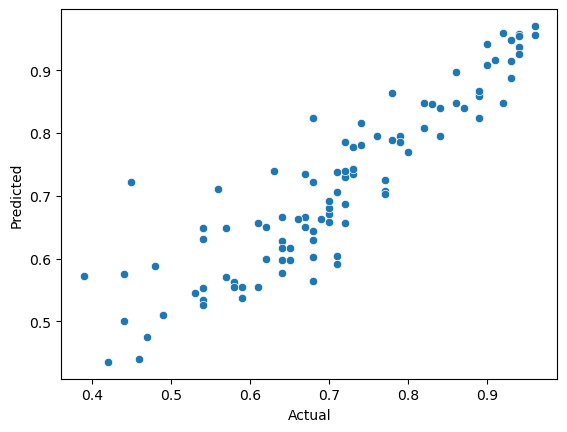

In [82]:
sns.scatterplot(data=test1, x="Actual", y="Predicted")
plt.show()

## Normality of Residuals

### Checking for the Error

In [83]:
Error = test1["Actual"] - test1["Predicted"]
Error[:10]

361    0.015425
73     0.044819
374   -0.182660
155    0.062630
104   -0.075883
394    0.027934
377   -0.004597
124   -0.078509
68    -0.143787
450    0.012585
dtype: float64

## The mean of residuals is nearly zero

In [84]:
Error.mean()

-0.005453623717661262

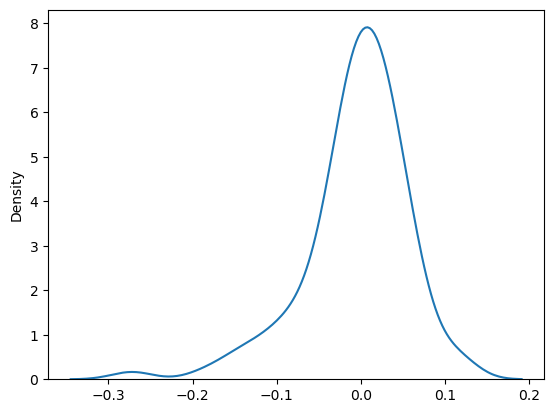

In [85]:
sns.kdeplot(Error)
plt.show()

### Checking with the QQ plot, for the Regression of fit of line

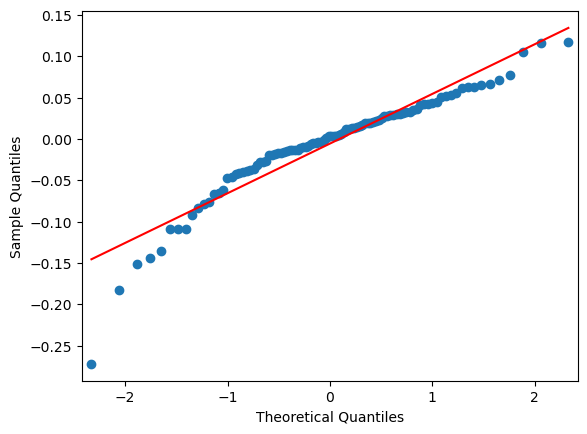

In [86]:
sm.qqplot(Error, line="r")
plt.show()

### QQ Plot, with Actual and Predicted Line with the best fit of regression

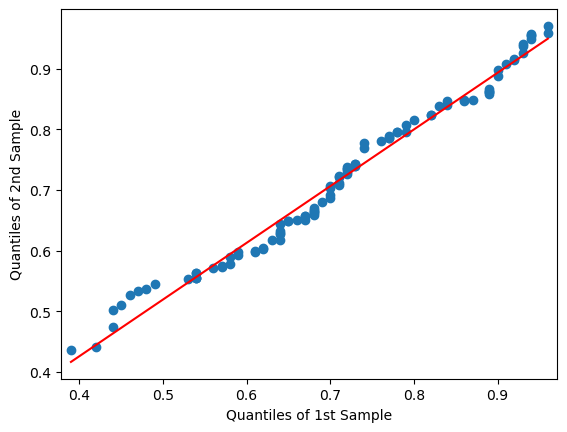

In [87]:
sm.qqplot_2samples(y_test, y_pred, line='r')
plt.show()

### Checking for the Homoscedasticity 

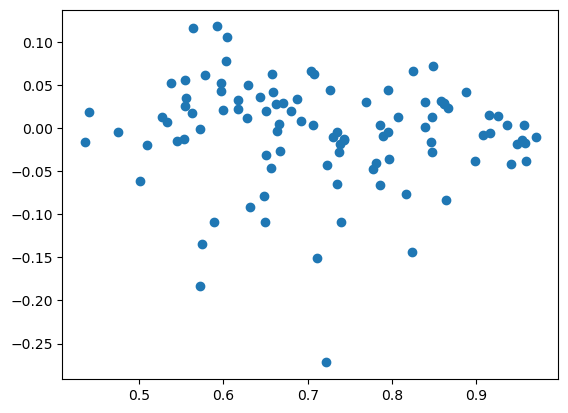

In [88]:
plt.scatter(y_pred, Error)
plt.show()

# Let's Check the Adjusted R2 Score

In [89]:
n , d =X_train.shape
print("Number of Rows:",n,"Features",d)
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
1 - (Numerator/Denominator)

Number of Rows: 400 Features 7


0.8156083149398015

## Multicollinearity checking by VIF score 

In [90]:
X_multicheck =pd.DataFrame(X_train, columns=X_train.columns)
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,39.76
0,GRE Score,31.20
1,TOEFL Score,26.76
3,SOP,18.57
4,LOR,11.01
2,University Rating,10.95
6,Research,3.36


In [91]:
X_multicheck.drop(columns={"CGPA"}, inplace=True)

In [92]:
X_multicheck.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research
0,0.62,0.678571,0.50,0.625,0.714286,1.0
1,0.52,0.678571,0.75,0.750,1.000000,0.0
2,0.26,0.357143,0.50,0.625,0.428571,0.0
3,0.48,0.535714,0.25,0.375,0.714286,0.0
4,0.36,0.500000,0.50,0.625,0.285714,1.0


In [93]:
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,24.83
1,TOEFL Score,24.22
3,SOP,17.26
2,University Rating,10.90
4,LOR,10.15
5,Research,3.36


In [94]:
X_multicheck.drop(columns={"GRE Score"}, inplace=True)

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,SOP,17.07
0,TOEFL Score,12.73
1,University Rating,10.79
3,LOR,10.09
4,Research,2.99


In [96]:
X_multicheck.drop(columns={"SOP"}, inplace=True)

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TOEFL Score,10.51
1,University Rating,9.33
2,LOR,8.17
3,Research,2.98


In [98]:
X_multicheck.drop(columns={"TOEFL Score"}, inplace=True)

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,University Rating,7.19
1,LOR,6.49
2,Research,2.77


In [100]:
X_multicheck.drop(columns={"University Rating"}, inplace=True)

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_multicheck.columns
vif['VIF'] = [variance_inflation_factor(X_multicheck.values, i) for i in range(X_multicheck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LOR,2.44
1,Research,2.44


### Checking Adjusted R2 for No Multicollinearity or less than 5 VIF Score

In [102]:
n,d = X_multicheck.shape

In [103]:
n , d =X_multicheck.shape
print("Number of Rows:",n,"Features",d)
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
1 - (Numerator/Denominator)

Number of Rows: 400 Features 2


0.8179306283536579

## Let's Analyse the Stats Summary for the Regression Data using OLS

Here we are adding the constant just because in the OLS (Ordinary least sqaure) do not add the constant in the equation

In [104]:
x_sm = sm.add_constant(X_train)

In [105]:
y_train1 = y_train.values
y_train1 = y_train1.reshape(-1,1)
y_train1.shape

(400, 1)

In [106]:
model = sm.OLS(y_train1,x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          3.41e-142
Time:                        11:51:32   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3556      0.01

## Let's Analyse for the better Performance of the model with Polynomial Features

In [107]:
df[:2]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [108]:
X_train.shape

(400, 7)

In [109]:
X_test.shape

(100, 7)

In [110]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [111]:
model = LinearRegression()
model

LinearRegression()

In [112]:
Xtrain = poly.fit_transform(X_train)
Xtrain.shape

(400, 35)

In [113]:
Xtest = poly.transform(X_test)
Xtest.shape

(100, 35)

In [114]:
model.fit(Xtrain, y_train)

LinearRegression()

In [115]:
ypoly_predition = model.predict(Xtest)

In [116]:
polypredicted = pd.DataFrame({
    "Actual": y_test,
    "Poly_predicted" : model.predict(Xtest)
})
polypredicted[:10]

,Actual,Poly_predicted
361,0.93,0.910068
73,0.84,0.802416
374,0.39,0.583174
155,0.77,0.710472
104,0.74,0.819335
394,0.89,0.861433
377,0.47,0.497188
124,0.57,0.634287
68,0.68,0.834664
450,0.82,0.785685


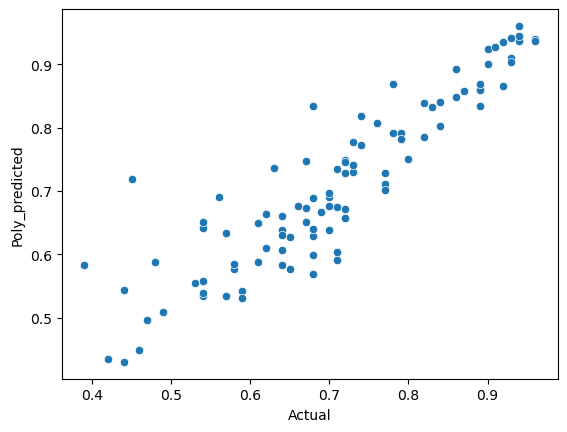

In [117]:
sns.scatterplot(data=polypredicted, x="Actual", y="Poly_predicted")
plt.show()

# Polynomial Prediction Performcae

In [118]:
model.score(Xtest, y_test)

0.826511555264336

# With the R2 Score Polynomial Rpediction

In [119]:
r2_score(y_test, ypoly_predition)

0.826511555264336

## Adjusted Rscore

In [120]:
n , d =Xtrain.shape
print("Number of Rows:",n,"Features",d)
Numerator = (1-r2)*(n-1)
Denominator = (n-d-1)
1 - (Numerator/Denominator)

Number of Rows: 400 Features 35


0.8014243391659401

## Residuals

In [121]:
polyerror = y_test - ypoly_predition
polyerror[:10] 

361    0.019932
73     0.037584
374   -0.193174
155    0.059528
104   -0.079335
394    0.028567
377   -0.027188
124   -0.064287
68    -0.154664
450    0.034315
Name: Chance of Admit , dtype: float64

### Checking for the Mean of residuals

In [122]:
np.mean(polyerror)

-0.004070822574379355

### Normality of Residuals

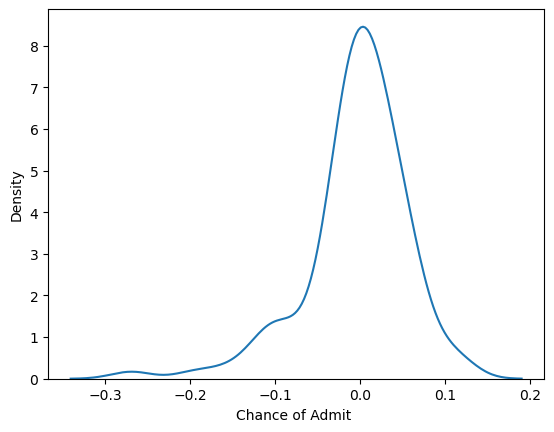

In [123]:
sns.kdeplot(polyerror)
plt.show()

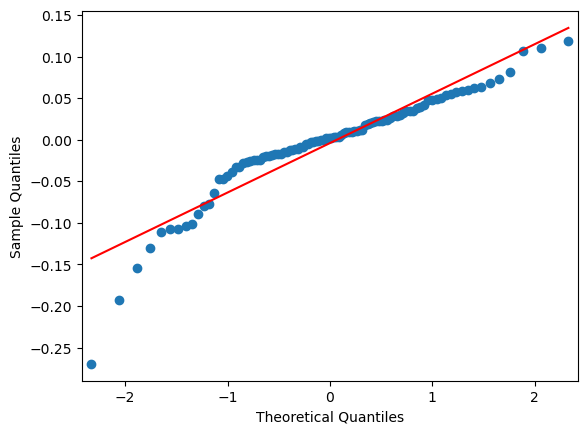

In [124]:
sm.qqplot(polyerror, line='s')
plt.show()

### Checking for the Homoscedasticity 

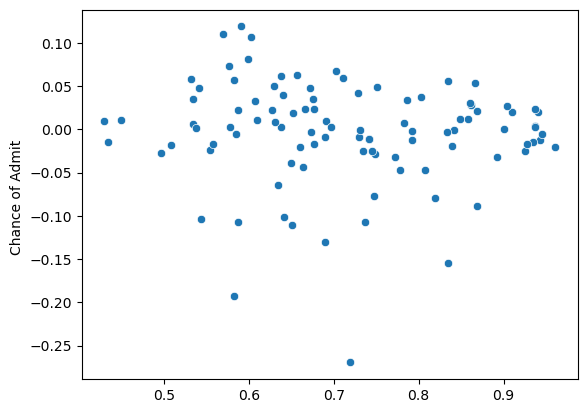

In [125]:
sns.scatterplot(x=ypoly_predition, y=polyerror)
plt.show()

# MSE

In [126]:
mean_squared_error(y_train,model.predict(Xtrain))

0.00323626117137231

# MAE

In [127]:
mean_absolute_error(y_train, model.predict(Xtrain))

0.0400445567153648

# RMSE

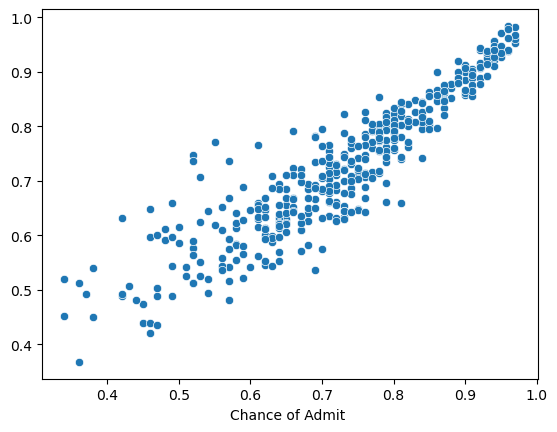

In [128]:
sns.scatterplot(x=y_train, y=model.predict(Xtrain))
plt.show()

In [129]:
n,d = Xtest.shape
np.sqrt(((np.sum(model.predict(Xtest) - y_test))**2)/n)

0.04070822574379355

In [130]:
x_sm = sm.add_constant(Xtrain)
y_polytrain = y_train.values
y_polytrain = y_train1.reshape(-1,1)
y_polytrain.shape

(400, 1)

In [131]:
model = sm.OLS(y_polytrain,x_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     54.64
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          5.53e-122
Time:                        11:51:33   Log-Likelihood:                 579.09
No. Observations:                 400   AIC:                            -1088.
Df Residuals:                     365   BIC:                            -948.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3371      0.025     13.344      0.0

### Checking for the Regularisation as per both Lasso and Ridge Regression

### Lasso Regression

In [132]:
Xtrain.shape, Xtest.shape

((400, 35), (100, 35))

In [133]:
y_train.shape, y_test.shape

((400,), (100,))

In [134]:
Lassomodel = Lasso(alpha=1)
Lassomodel

Lasso(alpha=1)

In [135]:
Lassomodel.fit(Xtrain, y_train)

Lasso(alpha=1)

In [136]:
Lassomodel.coef_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [137]:
Lassomodel.intercept_

0.7241749999999999

In [138]:
y_test[:10]

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
Name: Chance of Admit , dtype: float64

In [139]:
Lassomodel.predict(Xtest)[:10]

array([0.724175, 0.724175, 0.724175, 0.724175, 0.724175, 0.724175,
       0.724175, 0.724175, 0.724175, 0.724175])

In [140]:
Lassomodel.score(Xtest, y_test)

-0.00724844132029312

In [141]:
Lassomodel.score(Xtrain, y_train)

0.0

In [142]:
RidgeModelprediction = pd.DataFrame({
    "Actual" : y_test,
    "Lasso_predicted": Lassomodel.predict(Xtest)
})
RidgeModelprediction[:10]

,Actual,Lasso_predicted
361,0.93,0.724175
73,0.84,0.724175
374,0.39,0.724175
155,0.77,0.724175
104,0.74,0.724175
394,0.89,0.724175
377,0.47,0.724175
124,0.57,0.724175
68,0.68,0.724175
450,0.82,0.724175


## Residuals

In [143]:
Lassoerror = y_test - Lassomodel.predict(Xtest)
Lassoerror

361    0.205825
73     0.115825
374   -0.334175
155    0.045825
104    0.015825
         ...   
347   -0.304175
86    -0.004175
75    -0.004175
438   -0.054175
15    -0.184175
Name: Chance of Admit , Length: 100, dtype: float64

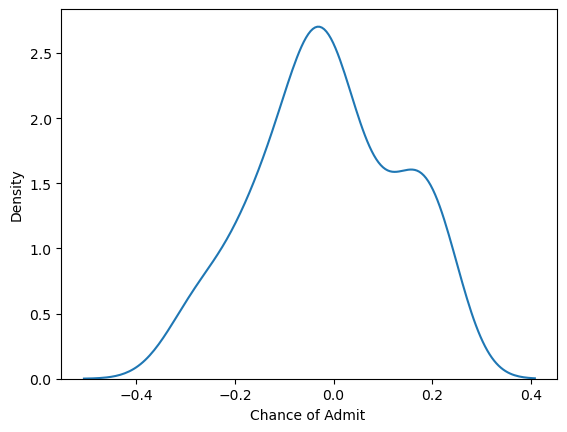

In [144]:
sns.kdeplot(Lassoerror)
plt.show()

### Ridge Regression

In [145]:
RidgeModel = Ridge(alpha=10)
RidgeModel

Ridge(alpha=10)

In [146]:
RidgeModel.fit(Xtrain, y_train)

Ridge(alpha=10)

In [147]:
RidgeModel.predict(Xtest).round(3)[:10]

array([0.905, 0.786, 0.593, 0.68 , 0.795, 0.858, 0.524, 0.634, 0.795,
       0.795])

In [148]:
RidgeModelprediction = pd.DataFrame({
    "Actual" : y_test,
    "Ridge_predicted": RidgeModel.predict(Xtest)
})
RidgeModelprediction[:10]

,Actual,Ridge_predicted
361,0.93,0.904978
73,0.84,0.785788
374,0.39,0.592760
155,0.77,0.679749
104,0.74,0.794887
394,0.89,0.857950
377,0.47,0.523715
124,0.57,0.633520
68,0.68,0.795477
450,0.82,0.795446


In [149]:
RidgeModel.score(Xtrain, y_train)

0.7984222986102354

In [150]:
RidgeModel.score(Xtest, y_test)

0.808361521766045

## Residuals

In [151]:
RidgeError = y_test - RidgeModel.predict(Xtest)
RidgeError

361    0.025022
73     0.054212
374   -0.202760
155    0.090251
104   -0.054887
         ...   
347   -0.083784
86     0.037310
75    -0.044379
438   -0.039057
15    -0.102562
Name: Chance of Admit , Length: 100, dtype: float64

### Normality of Residuals

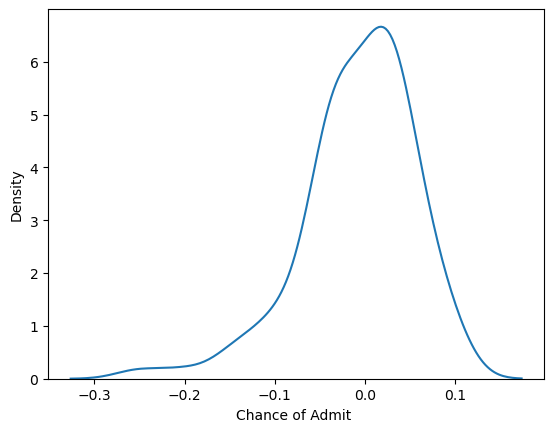

In [152]:
sns.kdeplot(RidgeError)
plt.show()

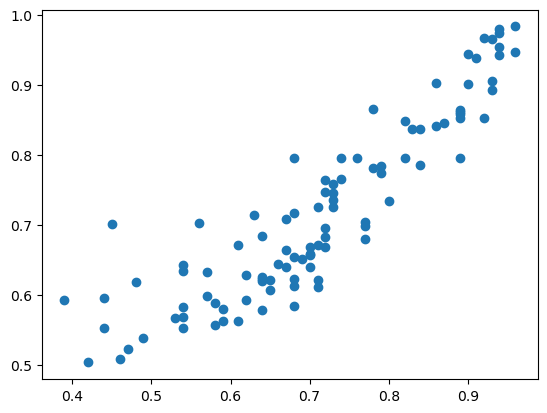

In [153]:
plt.scatter(x=y_test, y=RidgeModel.predict(Xtest))
plt.show()

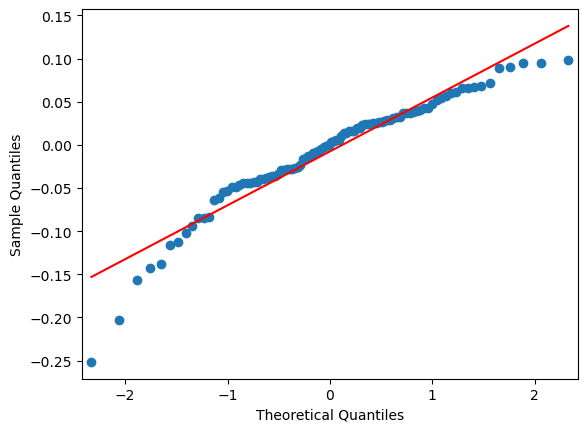

In [154]:
sm.qqplot(RidgeError, line="r")
plt.show()

# Cross Validation

### Cross Validation to check Performace

In [155]:
df1 = df
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [156]:
df1.shape

(500, 8)

In [157]:
X.shape, y.shape

((500, 7), (500,))

### Cross validation splitting and testing

In [158]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [159]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(300, 7) (300,)
(100, 7) (100,)
(100, 7) (100,)


In [160]:
ScalingCV = StandardScaler()
ScalingCV

StandardScaler()

In [161]:
Xtraincv = ScalingCV.fit_transform(X_train)
Xvalcv = ScalingCV.fit_transform(X_val)
Xtestcv = ScalingCV.transform(X_test)

In [162]:
Modelcv = LinearRegression()
Modelcv

LinearRegression()

In [163]:
Modelcv.fit(Xtraincv, y_train)

LinearRegression()

In [164]:
Modelcv.coef_

array([0.01481262, 0.02647675, 0.00923368, 0.00218789, 0.01131403,
       0.0703194 , 0.00986979])

In [165]:
Modelcv.intercept_

0.7213333333333334

In [166]:
Modelcv.score(Xtraincv, y_train)

0.8139677762213995

In [167]:
y_predcv = Modelcv.predict(Xvalcv)
y_predcv[:10]

array([0.86762623, 0.78173248, 0.48973201, 0.77807621, 0.71034476,
       0.75093003, 0.80244193, 0.47546132, 0.90502664, 0.57568781])

In [168]:
y_val[:10]

235    0.88
105    0.69
367    0.57
76     0.74
251    0.70
3      0.80
48     0.82
457    0.37
46     0.86
493    0.62
Name: Chance of Admit , dtype: float64

In [169]:
pd.DataFrame({
    "Actual":y_val,
    "predicted":y_predcv
})[:10]

,Actual,predicted
235,0.88,0.867626
105,0.69,0.781732
367,0.57,0.489732
76,0.74,0.778076
251,0.70,0.710345
3,0.80,0.750930
48,0.82,0.802442
457,0.37,0.475461
46,0.86,0.905027
493,0.62,0.575688


In [170]:
Modelcv.score(Xvalcv, y_val)

0.8456442461043934

In [171]:
Modelcv.score(Xtestcv, y_test)

0.8157876639860786

# Insights

# Recommendations